# Machinery (takes some time)

## Base packages

In [ ]:
libraries = c("dplyr", "magrittr", "tidyr", "ggplot2", "readxl")  
for(x in libraries) { library(x, character.only=TRUE, warn.conflicts=FALSE, quietly=TRUE) }

for(x in c("cowplot"))
  install.packages(x)

R.Version()$version.string

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "R version 4.0.4 (2021-02-15)"

In [ ]:

install.packages('versions')
library(versions)

library(devtools)
if(!require(cmdstanr)){
  devtools::install_github("stan-dev/cmdstanr", dependencies=c("Depends", "Imports"))
  library(cmdstanr)
}

if (!file.exists("cmdstan-2.23.0.tgz")) {
  system("wget https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz", intern=T)
  system("tar zxf colab-cmdstan-2.23.0.tar.gz", intern=T)
}
list.files("cmdstan-2.23.0")

set_cmdstan_path("cmdstan-2.23.0")
print_file <- function(file, nlines=-1L) {
  cat(paste(readLines(file, n=nlines), "\n", sep=""), sep="")
}

if (!require("devtools")) {
  install.packages("devtools")
}
devtools::install_github("stan-dev/bayesplot")

library(posterior)
library(bayesplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



character(0)

[1] "bin"                "examples"           "install-tbb.bat"   
 [4] "Jenkinsfile"        "lib"                "LICENSE"           
 [7] "make"               "makefile"           "README.md"         
[10] "runCmdStanTests.py" "src"                "stan"              
[13] "test-all.sh"

CmdStan path set to: /content/cmdstan-2.23.0

Skipping install of 'bayesplot' from a github remote, the SHA1 (665c6876) has not changed since last install.
  Use `force = TRUE` to force installation



# Loading the data

In [ ]:
system("gdown --id 1gWnErS7eKKbqfzfVI1CFpYtPgOm1RrXl")
list.files()

[1] "cmdstan-2.23.0"              "colab-cmdstan-2.23.0.tar.gz"
[3] "data_Taiwan.xlsx"            "sample_data"

In [ ]:
datafilename = "data_Taiwan.xlsx"
df_twn = read_excel(datafilename, na=c("NA",""))
(nrow(df_twn))
df_twn

[1] 915

ID,Age,Gender,Confirm,Nationality,ExposureLocation,ExposureType,ExposureDetail,ExposureLeft,ExposureRight,⋯,SymptomsRight,TestLeft,TestRight,Death,Negative test before the flight,Previously diagnosed,Symptoms,Source-1,Source-2,Remarks
<dbl>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,⋯,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>
1,55-59,F,2020-01-22,Taiwan,NA,Lives-works-studies in Wuhan,NA,NA,2020-01-20,⋯,NA,2020-01-20 12:00:00,NA,NA,NA,NA,NA,NA,NA,NA
2,50-54,F,2020-01-24,China,NA,International travel,NA,NA,2020-01-21,⋯,NA,2020-01-23 12:00:00,NA,NA,NA,NA,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/xzPuzBOQiW0Gjw1MfyNKnw?typeid=158,NA,NA
3,55-59,M,2020-01-24,Taiwan,NA,International travel,NA,NA,2020-01-21,⋯,NA,2020-01-23 12:00:00,NA,NA,NA,NA,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/xzPuzBOQiW0Gjw1MfyNKnw?typeid=158,NA,NA
4,55-59,F,2020-01-26,Taiwan,NA,International travel,Travel to Wuhan,2020-01-13,2020-01-15,⋯,NA,2020-01-25 12:00:00,NA,NA,NA,NA,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/ium6WF2Y4-QJUIu2ho9dpQ?typeid=158,NA,NA
5,50-54,F,2020-01-27,Taiwan,NA,Lives-works-studies in Wuhan,NA,2019-10-21,2020-01-20,⋯,NA,2020-01-25 12:00:00,NA,NA,NA,NA,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/3-5SDzWWHj91fu_NLgS0gg?typeid=158,NA,NA
6,70+,F,2020-01-28,China,NA,Lives-works-studies in Wuhan,NA,NA,2020-01-22,⋯,NA,2020-01-25 12:00:00,NA,NA,NA,NA,NA,https://www.nejm.org/doi/full/10.1056/NEJMc2001573,NA,NA
7,70+,F,2020-01-28,China,NA,Lives-works-studies in Wuhan,NA,NA,2020-01-22,⋯,NA,2020-01-25 12:00:00,NA,NA,NA,NA,NA,https://www.nejm.org/doi/full/10.1056/NEJMc2001573,NA,NA
8,52.0,M,2020-01-28,Taiwan,彰化縣,Local,Household,2020-01-20,2020-01-25,⋯,NA,2020-01-26 12:00:00,NA,NA,NA,NA,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/3-5SDzWWHj91fu_NLgS0gg?typeid=158,ChenJian20_JAMAIntMed,NA
9,40-44,F,2020-01-30,Taiwan,南投縣,Local,Household,2020-01-12,2020-01-26,⋯,NA,2020-01-28 12:00:00,NA,NA,NA,NA,NA,https://www.taiwannews.com.tw/en/news/3867321,ChenJian20_JAMAIntMed,NA


In [ ]:
df_twn %>%
    select(-starts_with("Source")) %>%
    mutate(across(c("SymptomsRight", "SymptomsLeft", "ExposureRight", "ExposureLeft", "Confirm"), ~as.Date(.))) %>%
    filter(is.na(SymptomsLeft) & is.na(SymptomsRight) & is.na(ExposureLeft) & is.na(ExposureRight))

ID,Age,Gender,Confirm,Nationality,ExposureLocation,ExposureType,ExposureDetail,ExposureLeft,ExposureRight,SymptomsLeft,SymptomsRight,TestLeft,TestRight,Death,Negative test before the flight,Previously diagnosed,Symptoms,Remarks
<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<date>,<dttm>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<chr>
40,70+,F,2020-03-01,Taiwan,NA,International travel,Diamond Princess,NA,NA,NA,NA,NA,NA,NA,NA,Yes,NA,NA
380,20+,M,2020-04-09,Taiwan,NA,Local,NA,NA,NA,NA,NA,2020-04-06,NA,NA,NA,NA,NA,NA
386,20+,M,2020-04-12,Taiwan,NA,Local,Contact with a case,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
470,20+,M,2020-08-01,Philippines,NA,International travel,Crew,NA,NA,NA,NA,2020-07-30,NA,NA,NA,NA,無症狀,NA
909,20-24,F,2021-01-30,Taiwan,桃園市,Local,Household,NA,NA,NA,NA,2021-01-29,NA,NA,NA,NA,NA,"Family 863, 907, 909, 910. Family gathering case 863, 864, 865"
910,80+,M,2021-01-30,Taiwan,桃園市,Local,Household,NA,NA,NA,NA,2021-01-29,NA,NA,NA,NA,NA,"Family 863, 907, 909, 910. Family gathering case 863, 864, 865"


In [ ]:
df_twn %<>%
    select(-starts_with("Source"),-starts_with("Remark"),-Symptoms) %>%
    mutate(across(c("SymptomsRight", "SymptomsLeft", "ExposureRight", "ExposureLeft", "Confirm"), ~as.Date(.))) %>%
    filter((!is.na(SymptomsLeft) | !is.na(SymptomsRight) | !is.na(ExposureLeft) | !is.na(ExposureRight))) %>%
    mutate(
           SymptomsRight = if_else(is.na(SymptomsRight), SymptomsLeft, SymptomsRight),   
           ExposureRight = if_else((ExposureRight>=SymptomsRight) | is.na(ExposureRight), SymptomsRight, ExposureRight),    
           SymptomsLeft = if_else(ExposureLeft <= SymptomsLeft | is.na(ExposureLeft), SymptomsLeft, ExposureLeft)
    ) 
(nrow(df_twn))
df_twn

[1] 909

ID,Age,Gender,Confirm,Nationality,ExposureLocation,ExposureType,ExposureDetail,ExposureLeft,ExposureRight,SymptomsLeft,SymptomsRight,TestLeft,TestRight,Death,Negative test before the flight,Previously diagnosed
<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<date>,<dttm>,<dttm>,<dttm>,<dttm>,<chr>
1,55-59,F,2020-01-22,Taiwan,NA,Lives-works-studies in Wuhan,NA,NA,2020-01-11,2020-01-11,2020-01-11,2020-01-20 12:00:00,NA,NA,NA,NA
2,50-54,F,2020-01-24,China,NA,International travel,NA,NA,2020-01-21,2020-01-23,2020-01-23,2020-01-23 12:00:00,NA,NA,NA,NA
3,55-59,M,2020-01-24,Taiwan,NA,International travel,NA,NA,2020-01-20,2020-01-20,2020-01-20,2020-01-23 12:00:00,NA,NA,NA,NA
4,55-59,F,2020-01-26,Taiwan,NA,International travel,Travel to Wuhan,2020-01-13,2020-01-15,2020-01-22,2020-01-22,2020-01-25 12:00:00,NA,NA,NA,NA
5,50-54,F,2020-01-27,Taiwan,NA,Lives-works-studies in Wuhan,NA,2019-10-21,2020-01-20,2020-01-25,2020-01-25,2020-01-25 12:00:00,NA,NA,NA,NA
6,70+,F,2020-01-28,China,NA,Lives-works-studies in Wuhan,NA,NA,2020-01-22,2020-01-25,2020-01-25,2020-01-25 12:00:00,NA,NA,NA,NA
7,70+,F,2020-01-28,China,NA,Lives-works-studies in Wuhan,NA,NA,2020-01-22,2020-01-23,2020-01-23,2020-01-25 12:00:00,NA,NA,NA,NA
8,52.0,M,2020-01-28,Taiwan,彰化縣,Local,Household,2020-01-20,2020-01-25,2020-01-26,2020-01-26,2020-01-26 12:00:00,NA,NA,NA,NA
9,40-44,F,2020-01-30,Taiwan,南投縣,Local,Household,2020-01-12,2020-01-26,2020-01-27,2020-01-27,2020-01-28 12:00:00,NA,NA,NA,NA


In [ ]:
df_twn %<>%
  select(ID, Gender, Nationality, ExposureType, ExposureDetail, SymptomsLeft, Confirm) %>%
  rename(Onset = SymptomsLeft)
df_twn

ID,Gender,Nationality,ExposureType,ExposureDetail,Onset,Confirm
<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>
1,F,Taiwan,Lives-works-studies in Wuhan,NA,2020-01-11,2020-01-22
2,F,China,International travel,NA,2020-01-23,2020-01-24
3,M,Taiwan,International travel,NA,2020-01-20,2020-01-24
4,F,Taiwan,International travel,Travel to Wuhan,2020-01-22,2020-01-26
5,F,Taiwan,Lives-works-studies in Wuhan,NA,2020-01-25,2020-01-27
6,F,China,Lives-works-studies in Wuhan,NA,2020-01-25,2020-01-28
7,F,China,Lives-works-studies in Wuhan,NA,2020-01-23,2020-01-28
8,M,Taiwan,Local,Household,2020-01-26,2020-01-28
9,F,Taiwan,Local,Household,2020-01-27,2020-01-30


In [ ]:
df_twn %>% filter(Onset > Confirm)

ID,Gender,Nationality,ExposureType,ExposureDetail,Onset,Confirm
<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>
41,F,Taiwan,Local,Household,2020-03-03,2020-03-02


# Gamma distributution



```


```

## Variation in the reporting delay

In [ ]:
df_delay %<>% mutate(ExposureType=if_else(ExposureType=='Local','Local','Imported'))

In [ ]:
df_delay

ID,Gender,Nationality,ExposureType,ExposureDetail,Onset,Confirm,onset_day,confirmation_day
<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<dbl>,<dbl>
1,F,Taiwan,Imported,NA,2020-01-11,2020-01-22,10,21
2,F,China,Imported,NA,2020-01-23,2020-01-24,22,23
3,M,Taiwan,Imported,NA,2020-01-20,2020-01-24,19,23
4,F,Taiwan,Imported,Travel to Wuhan,2020-01-22,2020-01-26,21,25
5,F,Taiwan,Imported,NA,2020-01-25,2020-01-27,24,26
6,F,China,Imported,NA,2020-01-25,2020-01-28,24,27
7,F,China,Imported,NA,2020-01-23,2020-01-28,22,27
8,M,Taiwan,Local,Household,2020-01-26,2020-01-28,25,27
9,F,Taiwan,Local,Household,2020-01-27,2020-01-30,26,29


In [ ]:
# to define max delay
df_delay %>% group_by(ExposureType) %>% mutate(diff = confirmation_day+1-onset_day) %>% 
  summarise(upper = quantile(diff, .99) %>% unname) -> df_maxdelay
df_maxdelay

,ExposureType,upper
,<chr>,<dbl>
1,Imported,43
2,Local,30


In [ ]:
maxdelay = max(df_maxdelay['upper'])
maxdelay

[1] 43

In [ ]:
df_delay %>% group_by(ExposureType) %>% mutate(diff = confirmation_day+1-onset_day) %>% 
  summarise(upper = quantile(diff, .9) %>% unname) -> df_delay90
df_delay90

,ExposureType,upper
,<chr>,<dbl>
1,Imported,17.0
2,Local,20.8


In [ ]:
df_twn %>% mutate(diff = Confirm+1-Onset) %>% filter(ExposureType=='Local') %>%
  arrange(-diff) ->df_twnx
  nrow(df_twnx)

[1] 71

In [ ]:
(tmax = max(df_delay$confirmation_day))

[1] 398

In [ ]:
df_delay %>% mutate(t=onset_day, d=confirmation_day-onset_day,
  d = if_else(d > maxdelay, maxdelay, d)) %>%
  select(t, d, ExposureType) %>%
  group_by(t, d, ExposureType) %>% count %>%
  right_join(expand_grid(t= seq(from = 1, to = tmax, by = 1), d = seq(from = 0, to = maxdelay, by = 1),
    ExposureType=c("Imported","Local"))) %>% 
  replace(is.na(.), 0) -> df_cases
df_cases %<>% group_by(ExposureType,d,t) %>% summarize(n = sum(n)) %>%
  mutate(date = mindate + t)
df_cases %>% head

Joining, by = c("t", "d", "ExposureType")

`summarise()` has grouped output by 'ExposureType', 'd'. You can override using the `.groups` argument.



ExposureType,d,t,n,date
<chr>,<dbl>,<dbl>,<int>,<date>
Imported,0,1,0,2020-01-02
Imported,0,2,0,2020-01-03
Imported,0,3,0,2020-01-04
Imported,0,4,0,2020-01-05
Imported,0,5,0,2020-01-06
Imported,0,6,0,2020-01-07


# Reproduction number (Cori et al)

In [ ]:
df_cases

ExposureType,d,t,n,date
<chr>,<dbl>,<dbl>,<int>,<date>
Imported,0,1,0,2020-01-02
Imported,0,2,0,2020-01-03
Imported,0,3,0,2020-01-04
Imported,0,4,0,2020-01-05
Imported,0,5,0,2020-01-06
Imported,0,6,0,2020-01-07
Imported,0,7,0,2020-01-08
Imported,0,8,0,2020-01-09
Imported,0,9,0,2020-01-10


In [ ]:
df_cases %>% filter(ExposureType == "Local") %>%
  group_by(t, ExposureType) %>% summarise(n = sum(n)) %>% ungroup %>%
  spread(ExposureType, n) %>% 
  arrange(t) -> Df
Df 
nrow(Df)
sum(Df$Local)

`summarise()` has grouped output by 't'. You can override using the `.groups` argument.



t,Local
<dbl>,<int>
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


[1] 398

[1] 62

In [ ]:
# Stan program
stan_code = "functions {
    /* calculating the convolutions */
    // X: first function, Yrev: reversed version of the second function
    // K: length of X and Yrev
    // the result is the vector of length K-1, because the first element equal zero is omitted
    vector convolution(vector X, vector Yrev, int K) {
        vector[K-1] res;
        res[1] = X[1]*Yrev[K];
        for (k in 2:K-1) 
            res[k] = dot_product(head(X, k), tail(Yrev, k)); // by definition of the convolution

        return res;        
    }
}

data {
  int<lower = 1> K;
  //int<lower = 0> imported[K];
  int<lower = 0> local[K];

  // Serial interval
  real param1_SI;
  real param2_SI;

  // smoothing window
  int smoothing_window;
}

transformed data {
  vector[K-1] conv;
  vector[K] total_cases = to_vector(local); // + to_vector(imported)

  {
    vector[K] gt;
    vector[K] gt_rev; 

    // calculating the discrete version of the weibull distribution
    vector[K] gt_cdf;
    for (i in 1:K) 
      gt_cdf[i] = exp(weibull_lcdf(i | param1_SI, param2_SI));
    gt = append_row(gt_cdf[1], gt_cdf[2:K] - gt_cdf[1:(K-1)]);

    // reverting
    for (i in 1:K)
      gt_rev[i] = gt[K + 1 - i];

    conv = convolution(total_cases, gt_rev, K);
  }
}

parameters {
  // the vector of instantaneous reproduction numbers 
  vector<lower = 0>[K-1] Rt;
}

model {
  Rt ~ normal(2.4, 2.0);

  for (s in 1:smoothing_window)
    target += poisson_lpmf(local[2:K-s+1] | Rt[s:K-1] .* conv[1:K-s] + 1.0e-8);
}"
stan_file = write_stan_file(stan_code)

# smoothing window is 5, because it is one generation time period
data_list = list(local = Df$Local, K = nrow(Df), smoothing_window = 5,  #imported = Df$Imported,
                param1_SI = 2.305, param2_SI = 5.452)
data_file = tempfile(fileext = ".json")
write_stan_json(data_list, data_file)

In [ ]:
data_list

$local
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 2 1 0 1 0 0 1 0 1 2 0
 [38] 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 1 2 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 2 0 0 1
 [75] 0 7 0 0 2 0 1 3 1 2 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 1 1 0 0 0 0 2 0 2 0 4 0 3 0 1 0 0 0 0 0 1 0 0 0 0 0

$K
[1] 398

$smoothing_window
[1] 5

$param1_SI
[1] 2.31

$param2_SI
[1] 5.45

In [ ]:
# Compile example model
mod = cmdstan_model(stan_file)

# Condition on data
## seed number is used for possible reproducibility
fit = mod$sample(data = data_file, iter_sampling=1000, iter_warmup=500, chains=3, seed=123) 

Compiling Stan program...



Running MCMC with 3 sequential chains...

Chain 1 Iteration:    1 / 1500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 1500 [  6%]  (Warmup) 
Chain 1 Iteration:  200 / 1500 [ 13%]  (Warmup) 
Chain 1 Iteration:  300 / 1500 [ 20%]  (Warmup) 
Chain 1 Iteration:  400 / 1500 [ 26%]  (Warmup) 
Chain 1 Iteration:  500 / 1500 [ 33%]  (Warmup) 
Chain 1 Iteration:  501 / 1500 [ 33%]  (Sampling) 
Chain 1 Iteration:  600 / 1500 [ 40%]  (Sampling) 
Chain 1 Iteration:  700 / 1500 [ 46%]  (Sampling) 
Chain 1 Iteration:  800 / 1500 [ 53%]  (Sampling) 
Chain 1 Iteration:  900 / 1500 [ 60%]  (Sampling) 
Chain 1 Iteration: 1000 / 1500 [ 66%]  (Sampling) 
Chain 1 Iteration: 1100 / 1500 [ 73%]  (Sampling) 
Chain 1 Iteration: 1200 / 1500 [ 80%]  (Sampling) 
Chain 1 Iteration: 1300 / 1500 [ 86%]  (Sampling) 
Chain 1 Iteration: 1400 / 1500 [ 93%]  (Sampling) 
Chain 1 Iteration: 1500 / 1500 [100%]  (Sampling) 
Chain 1 finished in 10.4 seconds.
Chain 2 Iteration:    1 / 1500 [  0%]  (Warmup) 
Chain 2 Iteration:  

In [ ]:
output

Rt,Rt_lower,Rt_upper,onset
<dbl>,<dbl>,<dbl>,<date>
2.66,0.224,6.40,2020-01-03
2.69,0.186,6.61,2020-01-04
2.59,0.192,6.45,2020-01-05
2.70,0.222,6.28,2020-01-06
2.76,0.224,6.46,2020-01-07
2.69,0.219,6.54,2020-01-08
2.64,0.243,6.39,2020-01-09
2.70,0.224,6.33,2020-01-10
2.72,0.263,6.37,2020-01-11


In [ ]:
dfdate <- df_cases %>% filter(ExposureType == "Local")
nrow(dfdate)

[1] 17512

In [ ]:

#dfdate %<>% filter(date < max(dfdate$date))
output_ = fit$summary(c("Rt"), ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame
names(output_) = c("variable", "Rt", "Rt_lower", "Rt_upper")

out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))

output_ %>% cbind(dfdate) -> output
#output_ %>% 

 # mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), onset=mindate+index+1) %>%
  #select(-variable, -index) -> output
nrow(output) 

In [ ]:
df_cases

ExposureType,d,t,n,date
<chr>,<dbl>,<dbl>,<int>,<date>
Imported,0,1,0,2020-01-02
Imported,0,2,0,2020-01-03
Imported,0,3,0,2020-01-04
Imported,0,4,0,2020-01-05
Imported,0,5,0,2020-01-06
Imported,0,6,0,2020-01-07
Imported,0,7,0,2020-01-08
Imported,0,8,0,2020-01-09
Imported,0,9,0,2020-01-10


In [ ]:
sum(df_output$Local)

[1] 62

In [ ]:
df_cases %>% rename(onset=date) %>% group_by(t, onset, ExposureType) %>% summarise(n=sum(n)) %>%
  spread(ExposureType,n) %>%
  right_join(output) -> df_output
df_output 


`summarise()` has grouped output by 't', 'onset'. You can override using the `.groups` argument.

Joining, by = "onset"



t,onset,Imported,Local,Rt,Rt_lower,Rt_upper
<dbl>,<date>,<int>,<int>,<dbl>,<dbl>,<dbl>
2,2020-01-03,0,0,2.66,0.224,6.40
3,2020-01-04,0,0,2.69,0.186,6.61
4,2020-01-05,0,0,2.59,0.192,6.45
5,2020-01-06,0,0,2.70,0.222,6.28
6,2020-01-07,0,0,2.76,0.224,6.46
7,2020-01-08,0,0,2.69,0.219,6.54
8,2020-01-09,0,0,2.64,0.243,6.39
9,2020-01-10,0,0,2.70,0.224,6.33
10,2020-01-11,1,0,2.72,0.263,6.37


Warning message:
“Removed 1 rows containing missing values (position_stack).”


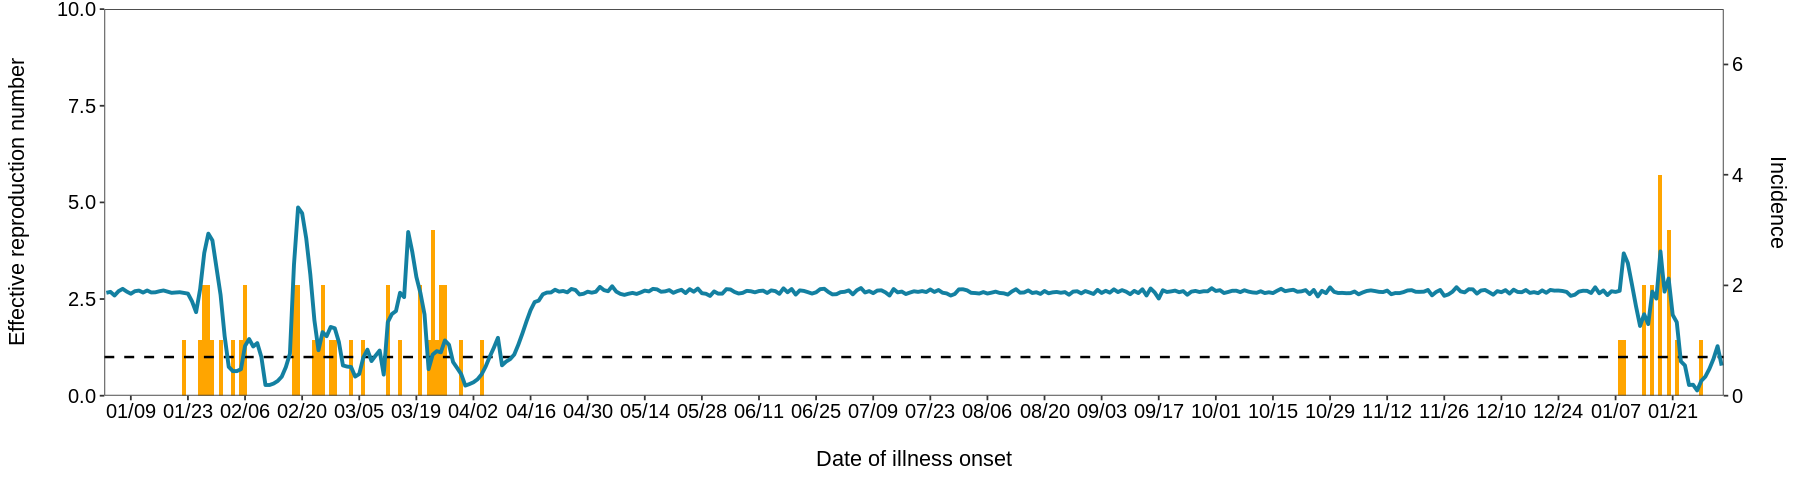

In [ ]:
Rt_max = 10
#ymax = max(df_output$Local+df_output$Imported)
ymax = max(df_output$Local)
scaling_parameter=ymax/Rt_max
options(repr.plot.width=15, repr.plot.height=4)

df_output %>% 
  ggplot(aes(x=onset)) +
-
    geom_bar(aes(y=Local/scaling_parameter), stat='identity', alpha=1, size=.4, width=1, fill="orange") +
    geom_hline(yintercept=1, linetype="dashed", color = "black", size = 0.7) + 
    geom_line(aes(y=Rt), color="#1380A1", size=1.1) +
   
    labs(x="\nDate of illness onset", y="Effective reproduction number\n") +
    scale_x_date(date_labels="%m/%d",date_breaks  = "14 days", expand = c(0, 0)) +
    scale_y_continuous(limit=c(0,ymax+1), expand = c(0, 0),
                        sec.axis = sec_axis(~.*scaling_parameter, name = "Incidence\n")) +
    coord_cartesian(ylim=c(0,Rt_max)) +
    theme_bw() + 
    theme(text = element_text(size=13, family="sans", color="black"),
      axis.text = element_text(size=12, family="sans", color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") 